Aqui começamos com a coleta de dados de uma base do kaggle focada em fake news:

Kaggle: https://www.kaggle.com/datasets/fabioselau/fakes-news-portuguese?select=true.csv

A base veio separada em Noticias verdadeiras e falsas o modelo de noticia verdadeira esta em no csv True.csv e o modelo de noticia falsa esta em fake.csv

Usei bibliotecas como pandas, re, stopwatch
Pandas: para analise de dados e concatenação das tabelas de fake news e noticiais reais

Escolhi essa base para entender um pouco melhor como funcionaria o tratamento de dados e o treinamento de texto, para uma analise se aquela palavra existe um peso maior ou não dentre outras e como funcionaria o agrapumento e o tratamento de dados


In [23]:
import pandas as pd
import re
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
df_fake = pd.read_csv("../dados/fakes.csv")
df_real = pd.read_csv("../dados/true.csv")
df = pd.concat([df_fake, df_real], ignore_index=True)

df
df_real

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saulo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,text,origin,url,label,publisher_name,publisher_site,date
0,Jovem Pan: o que é falso e o que é verdadeiro ...,As propostas de manter zerados impostos federa...,Jair Bolsonaro,https://lupa.uol.com.br/jornalismo/2022/09/06/...,0,Lupa - UOL,lupa.uol.com.br,NaN
1,Jovem Pan: o que é falso e o que é verdadeiro ...,Estatais dão lucro de mais de R$ 100 bilhões e...,Jair Bolsonaro,https://lupa.uol.com.br/jornalismo/2022/09/06/...,0,Lupa - UOL,lupa.uol.com.br,NaN
2,De cargos secretos a segurança: veja erros e a...,A água foi privatizada. A Cedae não acabou. Es...,Marcelo Freixo (PSB),https://lupa.uol.com.br/jornalismo/2022/09/01/...,0,Lupa - UOL,lupa.uol.com.br,NaN
3,De cargos secretos a segurança: veja erros e a...,São quase 3 milhões de pessoas passando fome [...,Marcelo Freixo (PSB),https://lupa.uol.com.br/jornalismo/2022/09/01/...,0,Lupa - UOL,lupa.uol.com.br,NaN
4,De cargos secretos a segurança: veja erros e a...,[Cláudio Castro] tem pouco mais de 20% de ótim...,Marcelo Freixo (PSB),https://lupa.uol.com.br/jornalismo/2022/09/01/...,0,Lupa - UOL,lupa.uol.com.br,NaN
...,...,...,...,...,...,...,...,...
2715,Um cachorro foi colocado em quarentena em Hong...,Teste em cão dá positivo para o novo coronavírus,Várias fontes,https://checamos.afp.com/um-cachorro-foi-coloc...,0,AFP Checamos,checamos.afp.com,2020-02-28T00:00:00Z
2716,A Prefeitura de Tucumã está entregando kits co...,Está com suspeita de coronavírus leva o kit pr...,Várias fontes,https://checamos.afp.com/prefeitura-de-tucuma-...,0,AFP Checamos,checamos.afp.com,2020-05-17T00:00:00Z
2717,O então presidente eleito Jair Bolsonaro disse...,Bolsonaro afirmou em 2018 que o indulto de Nat...,Múltiplas fontes,https://checamos.afp.com/o-entao-presidente-el...,0,AFP Checamos,checamos.afp.com,2019-12-23T00:00:00Z
2718,"Sim, Jair Bolsonaro declarou que a chegada de ...",Jair Bolsonaro declarou que a chegada de Hugo ...,Checamos,https://checamos.afp.com/sim-jair-bolsonaro-de...,0,AFP Checamos,checamos.afp.com,NaN


foi removido a tabela date, porque ela não terá nenhum peso relevante no nosso treinamento



In [24]:
df = df.drop(columns=['date'])


Renomeação de Colunas, as colunas foram renomeadas e traduzidas para um melhor entendimento  .

1. Title: Titulo da Noticia
2. Text: Texto da Noticia       
3. Origin: Origem
4. url: Link
5. Label: Classificacao da Noticia se é 
fake ou não 0 = Real e 1 = Fake
6. Publisher_name: Publicador da Noticia
7. Publisher_site: Site que foi Publicado
8. Date: Data que foi publicado

In [25]:
mapeamento_colunas = {
    'title': 'Titulo',
    'text': 'Texto',
    'origin': 'Origem' ,
    'url': 'url',
    'label': 'Classificacao',
    'publisher_name': 'Editora',
    'publisher_site': 'Site Editora',
}

df = df.rename(columns=mapeamento_colunas)

df.head()

,Titulo,Texto,Origem,url,Classificacao,Editora,Site Editora
0,Vídeo com vaias a Nando Reis teve áudio manipu...,“Nando Reis se F… Se F…. no Rock in Rio”,pessoa,https://lupa.uol.com.br/jornalismo/2022/09/09/...,1,Lupa - UOL,lupa.uol.com.br
1,Documentos confirmam uso de dinheiro vivo na c...,"“Não foi dinheiro vivo. Moeda corrente, quer d...",Cristina Graeml,https://lupa.uol.com.br/jornalismo/2022/09/09/...,1,Lupa - UOL,lupa.uol.com.br
2,G1 não publicou notícia de que rainha Elizabet...,"“Em seus últimos momentos de vida, rainha Eliz...",Imagem no WhatsApp,https://lupa.uol.com.br/jornalismo/2022/09/08/...,1,Lupa - UOL,lupa.uol.com.br
3,TSE não proibiu governo de tomar medidas para ...,“TSE MARCOU PARA PRÓXIMA SEMANA JULGAMENTO OND...,pessoa,https://lupa.uol.com.br/jornalismo/2022/09/08/...,1,Lupa - UOL,lupa.uol.com.br
4,É falso que órgão de saúde dos EUA passou a re...,"De repente, a Ivermectina aparece no site do N...",Post no WhatsApp,https://lupa.uol.com.br/jornalismo/2022/09/08/...,1,Lupa - UOL,lupa.uol.com.br


Aqui visualizaremos os dados faltantes da tabela, apesar de exister alguns dados faltantes eles não podem ser removidos porque durante proximas analises percebi que eles faziam diferença no vetor.

In [26]:
dados_faltantes = df.isna().sum()

print("Dados faltantes por coluna:")
print(dados_faltantes)

print(df.columns)



Dados faltantes por coluna:
Titulo              0
Texto               0
Origem           6305
url                 0
Classificacao       0
Editora           366
Site Editora        0
dtype: int64
Index(['Titulo', 'Texto', 'Origem', 'url', 'Classificacao', 'Editora',
       'Site Editora'],
      dtype='object')


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23198 entries, 0 to 23197
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Titulo         23198 non-null  object
 1   Texto          23198 non-null  object
 2   Origem         16893 non-null  object
 3   url            23198 non-null  object
 4   Classificacao  23198 non-null  int64 
 5   Editora        22832 non-null  object
 6   Site Editora   23198 non-null  object
 7   date           20128 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


Aqui verificamos os contadores de Classificacao para identificar os pesos na tabela

In [27]:
df['Classificacao'].value_counts()

Classificacao
1    20478
0     2720
Name: count, dtype: int64

Qual o tamanho do texto

In [28]:
df['Texto'].str.len().describe

<bound method NDFrame.describe of 0         40
1        163
2        281
3        300
4        251
        ... 
23193     48
23194    103
23195     77
23196     96
23197    111
Name: Texto, Length: 23198, dtype: int64>

Temas de texto mais presentes

In [41]:
fake_news = df[df['Classificacao'] == 1]
texto_falso = ' '.join(fake_news['Texto'].dropna().astype(str))
texto_falso = re.sub(r'[^\w\s]', '', texto_falso.lower())

palavras = texto_falso.split()
stopwords_pt = set(stopwords.words('portuguese'))
stopwords_pt.update(['sobre', 'vídeo', 'dados', 'erra', 'erros', 'mil', 'checamos','acertos', 'costa', 'verdade', 'falar', 'tempo', 'contra', 'r'])

serie_palavras = pd.Series(palavras)
frequencia = serie_palavras[~serie_palavras.isin(stopwords_pt)]
frequencia = frequencia.value_counts()
print(frequencia.head(10))

bolsonaro     1981
covid19       1382
lula          1237
brasil        1225
mostra        1045
governo       1003
anos           975
presidente     902
vacina         852
milhões        758
Name: count, dtype: int64


Temas de titulos de mais presentes

In [45]:
fake_news = df[df['Classificacao'] == 1]
texto_falso = ' '.join(fake_news['Titulo'].dropna().astype(str))
texto_falso = re.sub(r'[^\w\s]', '', texto_falso.lower())

palavras = texto_falso.split()
stopwords_pt = set(stopwords.words('portuguese'))
stopwords_pt.update(['sobre', 'vídeo', 'dados', 'erra', 'erros', 'mil', 'checamos','acertos', 'costa', 'verdade', 'falar', 'tempo', 'contra'])


serie_palavras = pd.Series(palavras)
frequencia = serie_palavras[~serie_palavras.isin(stopwords_pt)]
frequencia = frequencia.value_counts()
print(frequencia.head(10))

boato        2658
falso        2481
bolsonaro    2352
covid19      1854
fact         1652
check        1651
lula         1284
mostra       1100
foto          885
governo       807
Name: count, dtype: int64


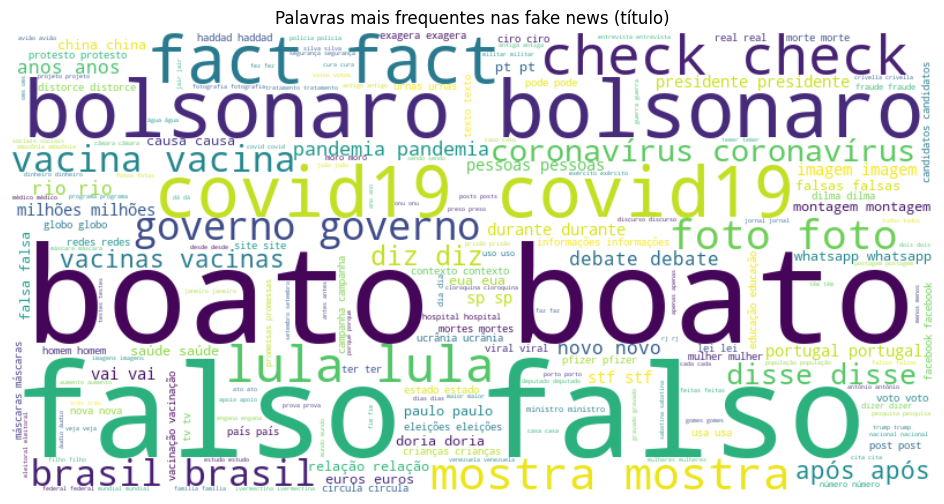

In [44]:
from wordcloud import WordCloud

texto_final = ' '.join(frequencia.index.repeat(frequencia.values))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_final)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Palavras mais frequentes nas fake news (título)")
plt.show()

Editoras com maior frequencia de fake news

In [32]:
fake_news = df[df['Classificacao'] == 1]
editoras_frequentes = fake_news['Editora'].value_counts()
print(editoras_frequentes.head(10))


Editora
Lupa - UOL                                                   4937
Polígrafo - SAPO                                             3415
Boatos.org                                                   2526
Aos Fatos                                                    2524
Observador                                                   1857
AFP Checamos                                                 1647
Política - Estadão                                           1315
UOL Notícias                                                  621
Política | Notícias do governo, STF e Congresso - Estadão     523
UOL Noticias                                                  473
Name: count, dtype: int64


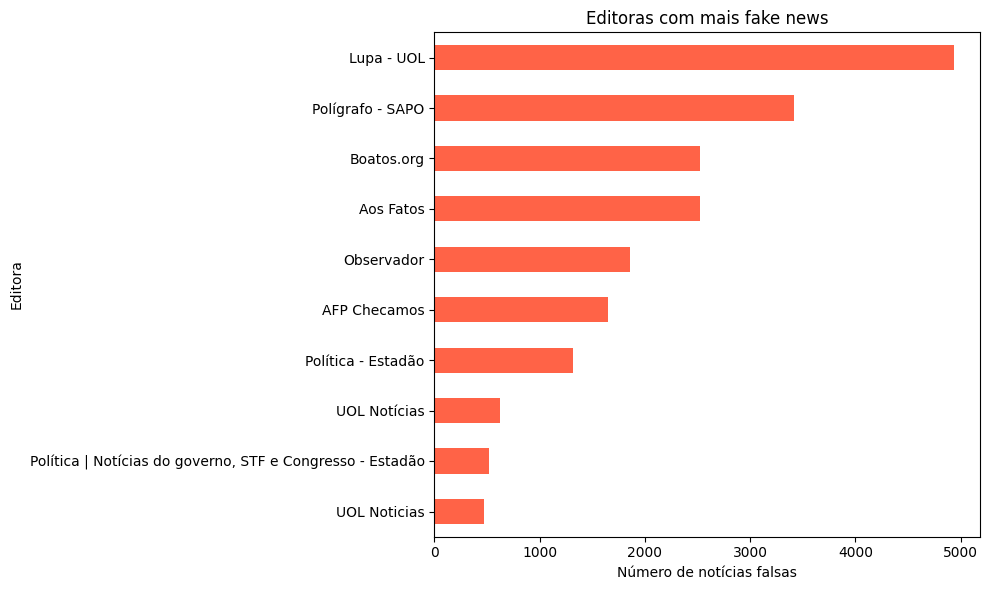

In [46]:
import matplotlib.pyplot as plt

editoras_frequentes.head(10).plot(kind='barh', figsize=(10, 6), title='Editoras com mais fake news', color='tomato')
plt.xlabel("Número de notícias falsas")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Aqui começamos com os encoders, passando variaveis como strings para numericas para conseuguir trabalhar melhor com o tratamento

In [47]:
from sklearn.preprocessing import LabelEncoder


df = df.copy()
df['Editora'] = df['Editora'].fillna('desconhecida').astype(str)

encoder_editora = LabelEncoder()
df['Editora_cod'] = encoder_editora.fit_transform(df['Editora'])


mapeamento_editora = {
    str(nome).strip().lower(): codigo
    for nome, codigo in zip(encoder_editora.classes_, encoder_editora.transform(encoder_editora.classes_))
}

print("Mapeamento para 'Editora':", mapeamento_editora)



Mapeamento para 'Editora': {'afp checamos': np.int64(0), 'aos fatos': np.int64(1), 'bol - uol': np.int64(2), 'boatos.org': np.int64(3), 'e-farsas': np.int64(4), 'lupa - uol': np.int64(5), 'observador': np.int64(6), 'polígrafo - sapo': np.int64(7), 'política - estadão': np.int64(8), 'política | notícias do governo, stf e congresso - estadão': np.int64(9), 'projeto comprova': np.int64(10), 'uol': np.int64(11), 'uol noticias': np.int64(12), 'uol notícias': np.int64(13), 'desconhecida': np.int64(14)}


In [48]:
from urllib.parse import urlparse
from sklearn.preprocessing import LabelEncoder

df['dominio'] = df['url'].apply(lambda x: urlparse(x).netloc if pd.notnull(x) else 'desconhecido')
df['dominio'] = df['dominio'].str.lower().str.strip()

encoder = LabelEncoder()
df['dominio_cod'] = encoder.fit_transform(df['dominio'])

df

,Titulo,Texto,Origem,url,Classificacao,Editora,Site Editora,Editora_cod,dominio,dominio_cod,Site_Editora_cod,origem_simplificada,origem_cod,conteudo
0,Vídeo com vaias a Nando Reis teve áudio manipu...,“Nando Reis se F… Se F…. no Rock in Rio”,pessoa,https://lupa.uol.com.br/jornalismo/2022/09/09/...,1,Lupa - UOL,lupa.uol.com.br,5,lupa.uol.com.br,2,5,Pessoa,8,Vídeo com vaias a Nando Reis teve áudio manipu...
1,Documentos confirmam uso de dinheiro vivo na c...,"“Não foi dinheiro vivo. Moeda corrente, quer d...",Cristina Graeml,https://lupa.uol.com.br/jornalismo/2022/09/09/...,1,Lupa - UOL,lupa.uol.com.br,5,lupa.uol.com.br,2,5,Outros,7,Documentos confirmam uso de dinheiro vivo na c...
2,G1 não publicou notícia de que rainha Elizabet...,"“Em seus últimos momentos de vida, rainha Eliz...",Imagem no WhatsApp,https://lupa.uol.com.br/jornalismo/2022/09/08/...,1,Lupa - UOL,lupa.uol.com.br,5,lupa.uol.com.br,2,5,WhatsApp,11,G1 não publicou notícia de que rainha Elizabet...
3,TSE não proibiu governo de tomar medidas para ...,“TSE MARCOU PARA PRÓXIMA SEMANA JULGAMENTO OND...,pessoa,https://lupa.uol.com.br/jornalismo/2022/09/08/...,1,Lupa - UOL,lupa.uol.com.br,5,lupa.uol.com.br,2,5,Pessoa,8,TSE não proibiu governo de tomar medidas para ...
4,É falso que órgão de saúde dos EUA passou a re...,"De repente, a Ivermectina aparece no site do N...",Post no WhatsApp,https://lupa.uol.com.br/jornalismo/2022/09/08/...,1,Lupa - UOL,lupa.uol.com.br,5,lupa.uol.com.br,2,5,WhatsApp,11,É falso que órgão de saúde dos EUA passou a re...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23193,Um cachorro foi colocado em quarentena em Hong...,Teste em cão dá positivo para o novo coronavírus,Várias fontes,https://checamos.afp.com/um-cachorro-foi-coloc...,0,AFP Checamos,checamos.afp.com,0,checamos.afp.com,1,3,Outros,7,Um cachorro foi colocado em quarentena em Hong...
23194,A Prefeitura de Tucumã está entregando kits co...,Está com suspeita de coronavírus leva o kit pr...,Várias fontes,https://checamos.afp.com/prefeitura-de-tucuma-...,0,AFP Checamos,checamos.afp.com,0,checamos.afp.com,1,3,Outros,7,A Prefeitura de Tucumã está entregando kits co...
23195,O então presidente eleito Jair Bolsonaro disse...,Bolsonaro afirmou em 2018 que o indulto de Nat...,Múltiplas fontes,https://checamos.afp.com/o-entao-presidente-el...,0,AFP Checamos,checamos.afp.com,0,checamos.afp.com,1,3,Outros,7,O então presidente eleito Jair Bolsonaro disse...
23196,"Sim, Jair Bolsonaro declarou que a chegada de ...",Jair Bolsonaro declarou que a chegada de Hugo ...,Checamos,https://checamos.afp.com/sim-jair-bolsonaro-de...,0,AFP Checamos,checamos.afp.com,0,checamos.afp.com,1,3,Outros,7,"Sim, Jair Bolsonaro declarou que a chegada de ..."


In [49]:
from sklearn.preprocessing import LabelEncoder

df['Site Editora'] = df['Site Editora'].fillna('desconhecido').astype(str)


encoder_site_editora = LabelEncoder()
df['Site_Editora_cod'] = encoder_site_editora.fit_transform(df['Site Editora'])


mapeamento_site_editora = {
    str(nome).strip().lower(): codigo
    for nome, codigo in zip(encoder_site_editora.classes_, encoder_site_editora.transform(encoder_site_editora.classes_))
}

df

,Titulo,Texto,Origem,url,Classificacao,Editora,Site Editora,Editora_cod,dominio,dominio_cod,Site_Editora_cod,origem_simplificada,origem_cod,conteudo
0,Vídeo com vaias a Nando Reis teve áudio manipu...,“Nando Reis se F… Se F…. no Rock in Rio”,pessoa,https://lupa.uol.com.br/jornalismo/2022/09/09/...,1,Lupa - UOL,lupa.uol.com.br,5,lupa.uol.com.br,2,5,Pessoa,8,Vídeo com vaias a Nando Reis teve áudio manipu...
1,Documentos confirmam uso de dinheiro vivo na c...,"“Não foi dinheiro vivo. Moeda corrente, quer d...",Cristina Graeml,https://lupa.uol.com.br/jornalismo/2022/09/09/...,1,Lupa - UOL,lupa.uol.com.br,5,lupa.uol.com.br,2,5,Outros,7,Documentos confirmam uso de dinheiro vivo na c...
2,G1 não publicou notícia de que rainha Elizabet...,"“Em seus últimos momentos de vida, rainha Eliz...",Imagem no WhatsApp,https://lupa.uol.com.br/jornalismo/2022/09/08/...,1,Lupa - UOL,lupa.uol.com.br,5,lupa.uol.com.br,2,5,WhatsApp,11,G1 não publicou notícia de que rainha Elizabet...
3,TSE não proibiu governo de tomar medidas para ...,“TSE MARCOU PARA PRÓXIMA SEMANA JULGAMENTO OND...,pessoa,https://lupa.uol.com.br/jornalismo/2022/09/08/...,1,Lupa - UOL,lupa.uol.com.br,5,lupa.uol.com.br,2,5,Pessoa,8,TSE não proibiu governo de tomar medidas para ...
4,É falso que órgão de saúde dos EUA passou a re...,"De repente, a Ivermectina aparece no site do N...",Post no WhatsApp,https://lupa.uol.com.br/jornalismo/2022/09/08/...,1,Lupa - UOL,lupa.uol.com.br,5,lupa.uol.com.br,2,5,WhatsApp,11,É falso que órgão de saúde dos EUA passou a re...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23193,Um cachorro foi colocado em quarentena em Hong...,Teste em cão dá positivo para o novo coronavírus,Várias fontes,https://checamos.afp.com/um-cachorro-foi-coloc...,0,AFP Checamos,checamos.afp.com,0,checamos.afp.com,1,3,Outros,7,Um cachorro foi colocado em quarentena em Hong...
23194,A Prefeitura de Tucumã está entregando kits co...,Está com suspeita de coronavírus leva o kit pr...,Várias fontes,https://checamos.afp.com/prefeitura-de-tucuma-...,0,AFP Checamos,checamos.afp.com,0,checamos.afp.com,1,3,Outros,7,A Prefeitura de Tucumã está entregando kits co...
23195,O então presidente eleito Jair Bolsonaro disse...,Bolsonaro afirmou em 2018 que o indulto de Nat...,Múltiplas fontes,https://checamos.afp.com/o-entao-presidente-el...,0,AFP Checamos,checamos.afp.com,0,checamos.afp.com,1,3,Outros,7,O então presidente eleito Jair Bolsonaro disse...
23196,"Sim, Jair Bolsonaro declarou que a chegada de ...",Jair Bolsonaro declarou que a chegada de Hugo ...,Checamos,https://checamos.afp.com/sim-jair-bolsonaro-de...,0,AFP Checamos,checamos.afp.com,0,checamos.afp.com,1,3,Outros,7,"Sim, Jair Bolsonaro declarou que a chegada de ..."


Foi feito uma analise que foi necessario simplificar as mensagems de origem, por duplicação, escrita errada e ate mesmo dado incorreto,

In [51]:
from sklearn.preprocessing import LabelEncoder

def simplificar_origem(origem):
    origem = str(origem).lower()
    if 'whatsapp' in origem:
        return 'WhatsApp'
    elif 'facebook' in origem:
        return 'Facebook'
    elif 'twitter' in origem:
        return 'Twitter'
    elif 'instagram' in origem:
        return 'Instagram'
    elif 'youtube' in origem:
        return 'YouTube'
    elif 'bolsonaro' in origem:
        return 'Bolsonaro'
    elif 'lula' in origem:
        return 'Lula'
    elif 'governo' in origem:
        return 'Governo'
    elif 'pessoa' in origem:
        return 'Pessoa'
    elif 'blog' in origem or 'site' in origem:
        return 'Blog/Site'
    elif 'imagem' in origem:
        return 'Imagem'
    elif 'áudio' in origem or 'audio' in origem:
        return 'Áudio'
    elif 'vídeo' in origem or 'video' in origem:
        return 'Vídeo'
    else:
        return 'Outros'

df['origem_simplificada'] = df['Origem'].apply(simplificar_origem)


encoder = LabelEncoder()
df['origem_cod'] = encoder.fit_transform(df['origem_simplificada'])
mapeamento = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Mapeamento de categorias:", mapeamento)
df

Mapeamento de categorias: {'Blog/Site': np.int64(0), 'Bolsonaro': np.int64(1), 'Facebook': np.int64(2), 'Governo': np.int64(3), 'Imagem': np.int64(4), 'Instagram': np.int64(5), 'Lula': np.int64(6), 'Outros': np.int64(7), 'Pessoa': np.int64(8), 'Twitter': np.int64(9), 'Vídeo': np.int64(10), 'WhatsApp': np.int64(11), 'YouTube': np.int64(12), 'Áudio': np.int64(13)}


,Titulo,Texto,Origem,url,Classificacao,Editora,Site Editora,Editora_cod,dominio,dominio_cod,Site_Editora_cod,origem_simplificada,origem_cod,conteudo
0,Vídeo com vaias a Nando Reis teve áudio manipu...,“Nando Reis se F… Se F…. no Rock in Rio”,pessoa,https://lupa.uol.com.br/jornalismo/2022/09/09/...,1,Lupa - UOL,lupa.uol.com.br,5,lupa.uol.com.br,2,5,Pessoa,8,Vídeo com vaias a Nando Reis teve áudio manipu...
1,Documentos confirmam uso de dinheiro vivo na c...,"“Não foi dinheiro vivo. Moeda corrente, quer d...",Cristina Graeml,https://lupa.uol.com.br/jornalismo/2022/09/09/...,1,Lupa - UOL,lupa.uol.com.br,5,lupa.uol.com.br,2,5,Outros,7,Documentos confirmam uso de dinheiro vivo na c...
2,G1 não publicou notícia de que rainha Elizabet...,"“Em seus últimos momentos de vida, rainha Eliz...",Imagem no WhatsApp,https://lupa.uol.com.br/jornalismo/2022/09/08/...,1,Lupa - UOL,lupa.uol.com.br,5,lupa.uol.com.br,2,5,WhatsApp,11,G1 não publicou notícia de que rainha Elizabet...
3,TSE não proibiu governo de tomar medidas para ...,“TSE MARCOU PARA PRÓXIMA SEMANA JULGAMENTO OND...,pessoa,https://lupa.uol.com.br/jornalismo/2022/09/08/...,1,Lupa - UOL,lupa.uol.com.br,5,lupa.uol.com.br,2,5,Pessoa,8,TSE não proibiu governo de tomar medidas para ...
4,É falso que órgão de saúde dos EUA passou a re...,"De repente, a Ivermectina aparece no site do N...",Post no WhatsApp,https://lupa.uol.com.br/jornalismo/2022/09/08/...,1,Lupa - UOL,lupa.uol.com.br,5,lupa.uol.com.br,2,5,WhatsApp,11,É falso que órgão de saúde dos EUA passou a re...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23193,Um cachorro foi colocado em quarentena em Hong...,Teste em cão dá positivo para o novo coronavírus,Várias fontes,https://checamos.afp.com/um-cachorro-foi-coloc...,0,AFP Checamos,checamos.afp.com,0,checamos.afp.com,1,3,Outros,7,Um cachorro foi colocado em quarentena em Hong...
23194,A Prefeitura de Tucumã está entregando kits co...,Está com suspeita de coronavírus leva o kit pr...,Várias fontes,https://checamos.afp.com/prefeitura-de-tucuma-...,0,AFP Checamos,checamos.afp.com,0,checamos.afp.com,1,3,Outros,7,A Prefeitura de Tucumã está entregando kits co...
23195,O então presidente eleito Jair Bolsonaro disse...,Bolsonaro afirmou em 2018 que o indulto de Nat...,Múltiplas fontes,https://checamos.afp.com/o-entao-presidente-el...,0,AFP Checamos,checamos.afp.com,0,checamos.afp.com,1,3,Outros,7,O então presidente eleito Jair Bolsonaro disse...
23196,"Sim, Jair Bolsonaro declarou que a chegada de ...",Jair Bolsonaro declarou que a chegada de Hugo ...,Checamos,https://checamos.afp.com/sim-jair-bolsonaro-de...,0,AFP Checamos,checamos.afp.com,0,checamos.afp.com,1,3,Outros,7,"Sim, Jair Bolsonaro declarou que a chegada de ..."


Por testes feitos posteriormentes eu precisei mudar a forma em que titulo e texto era analisadas e precisei juntar os dois em uma unica tabela para melhor analise.

In [52]:

from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_pt = list(stopwords.words('portuguese')) + ['vídeo', 'dados', 'erros', 'checamos', 'acertos']

df['conteudo'] = df['Titulo'].fillna('') + ' ' + df['Texto'].fillna('')

vectorizer = TfidfVectorizer(stop_words=stopwords_pt, max_features=10000)
X_texto = vectorizer.fit_transform(df['conteudo'])


In [75]:
df.dtypes

Titulo                 object
Texto                  object
Origem                 object
url                    object
Classificacao           int64
Editora                object
Site Editora           object
Editora_cod             int64
dominio                object
dominio_cod             int64
Site_Editora_cod        int64
origem_simplificada    object
origem_cod              int64
conteudo               object
dtype: object

Criando o arquivo de dados transformado

In [53]:
caminho_arquivo = '../dados/dados_transformados.csv'
df.to_csv(caminho_arquivo, index=False, encoding='utf-8-sig')